<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/python_/blob/main/day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
(x_train , y_train) , (x_test , y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [ ]:
# 데이터 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# 기본 CNN 모델을 정의
def create_model():
  model = models.Sequential([ # Pass layers as a list
      layers.Conv2D(32 , (3,3) , activation='relu' , input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64 , (3,3) , activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64 , (3,3) , activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64 , activation='relu'),
      layers.Dense(10 , activation='softmax')
  ])
  model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])
  return model

In [ ]:
# 이미지 증대 안하고 훈련
x_train2, x_val, y_train2 , y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
model_without_gen = create_model()
history = model_without_gen.fit(x_train2, y_train2 , epochs=10, batch_size = 64 , validation_data=(x_val , y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2752 - loss: 1.9455 - val_accuracy: 0.4570 - val_loss: 1.4889
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4905 - loss: 1.4107 - val_accuracy: 0.5357 - val_loss: 1.2892
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5492 - loss: 1.2491 - val_accuracy: 0.5783 - val_loss: 1.1607
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5998 - loss: 1.1313 - val_accuracy: 0.5829 - val_loss: 1.1730
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6255 - loss: 1.0568 - val_accuracy: 0.6270 - val_loss: 1.0858
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6522 - loss: 0.9922 - val_accuracy: 0.6439 - val_loss: 1.0120
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6743 - loss: 0.9282 - val_accuracy: 0.6630 - val_loss: 0.9824
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6922 - loss: 0.8793 - val_accuracy: 0.

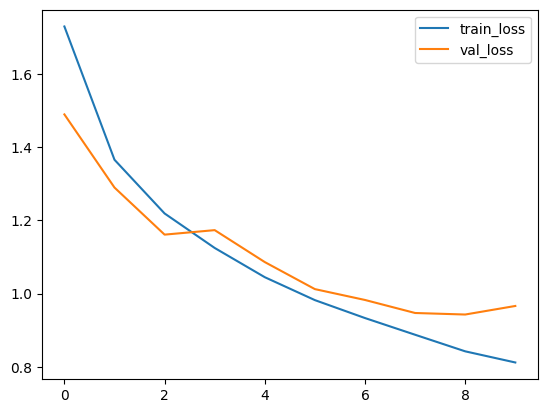

In [ ]:
# loss 시각화
plt.plot(history.history['loss'] , label='train_loss')
plt.plot(history.history['val_loss'] , label='val_loss')
plt.legend()
plt.show()

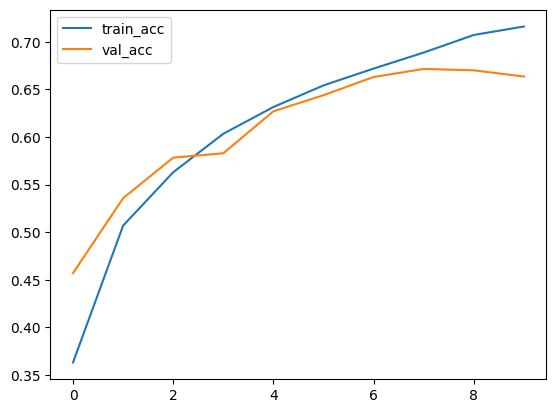

In [ ]:
# acc 시각화
plt.plot(history.history['accuracy'] , label='train_acc')
plt.plot(history.history['val_accuracy'] , label='val_acc')
plt.legend()
plt.show()

In [ ]:
# 모델 평가
test_loss , test_acc = model_without_gen.evaluate(x_test , y_test)
print(f'test_loss : {test_loss}, Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6703 - loss: 0.9784
test_loss : 0.9833316206932068, Test accuracy: 0.6636000275611877


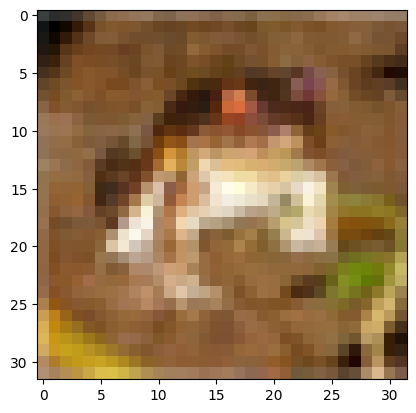

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

이미지 증대

In [ ]:
x_train2, x_val, y_train2 , y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# 이미지 증대 설정
image_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# 이미지 증대 데이터 생성
x_train_augmented = image_gen.flow(x_train2, y_train2, batch_size=32)


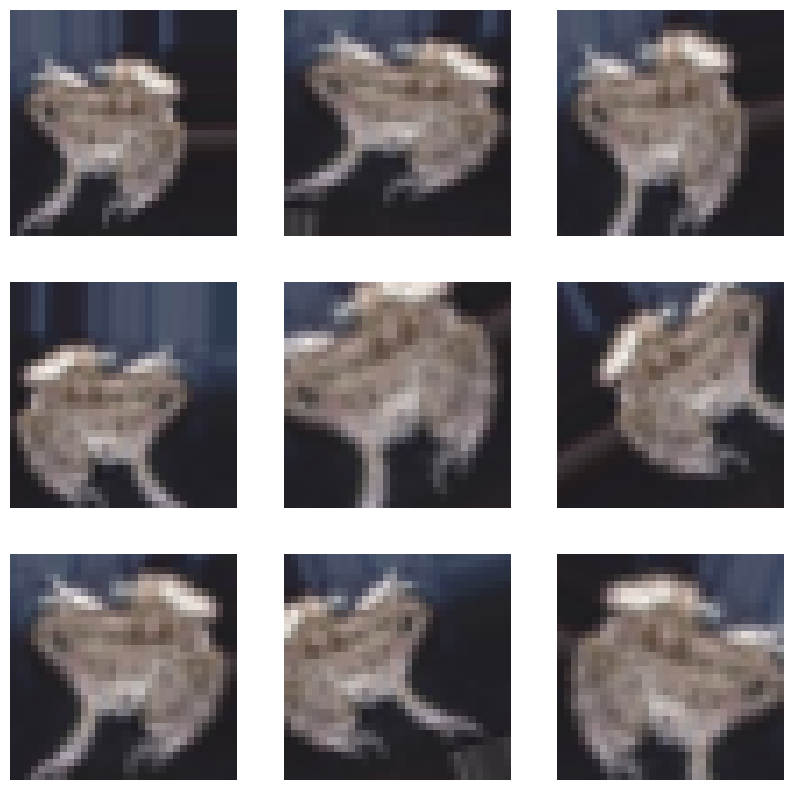

In [ ]:
# 생성한 데이터 보기
sample = x_train2[0]
samples = [image_gen.random_transform(sample) for _ in range(9)]
plt.figure(figsize=(10,10))
for i in range(9):
    # ... 나머지 코드 ...
  plt.subplot(3,3,i+1)
  plt.imshow(image_gen.random_transform(sample))
  plt.axis('off')
plt.show()

In [ ]:
model_with_gen = create_model()
history_with_gen = model_with_gen.fit(x_train_augmented, epochs=10, batch_size = 32 , validation_data=(x_val , y_val), n_job = -1) # Reduce batch size to 32

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.2441 - loss: 2.0127 - val_accuracy: 0.4288 - val_loss: 1.5320
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.3968 - loss: 1.6473 - val_accuracy: 0.5112 - val_loss: 1.3516
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4520 - loss: 1.5185 - val_accuracy: 0.5166 - val_loss: 1.3341
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4844 - loss: 1.4374 - val_accuracy: 0.5651 - val_loss: 1.2011
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5001 - loss: 1.3929 - val_accuracy: 0.5659 - val_loss: 1.2016
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5213 - loss: 1.3424 - val_accuracy: 0.5964 - val_loss: 1.1361
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5313 - loss: 1.3160 - val_accuracy: 0.5732 - val_loss: 1.1867
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5403 - loss: 1.29

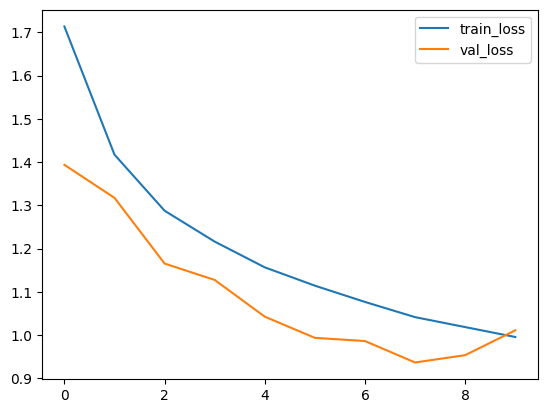

In [ ]:
# loss 시각화
plt.plot(history_with_gen.history['loss'] , label='train_loss')
plt.plot(history_with_gen.history['val_loss'] , label='val_loss')
plt.legend()
plt.show()

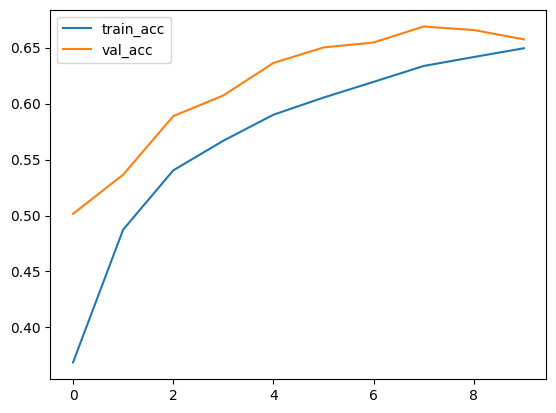

In [ ]:
# acc 시각화
plt.plot(history_with_gen.history['accuracy'] , label='train_acc')
plt.plot(history_with_gen.history['val_accuracy'] , label='val_acc')
plt.legend()
plt.show()

In [ ]:
# 모델 평가
test_loss , test_acc = model_with_gen.evaluate(x_test , y_test)
print(f'test_loss : {test_loss}, Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6628 - loss: 0.9909
test_loss : 1.0042752027511597, Test accuracy: 0.6571000218391418
